In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score

In [8]:
# Load dataset
df = pd.read_csv('Telco-Customer-Churn.csv')

In [6]:
# Display the first ten rows of the dataset.
# Output the names of the dataset's columns.
# Display the data types of each column.

df.head(10)
print(f'Column names:', df.columns)
print(df.dtypes)

Column names: Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object


In [11]:
# Convert column to numeric data type

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
print(df['TotalCharges'].isna().sum())
print(df.dtypes)

# Remove rows with missing values from the dataset
# Remove rows with any missing values
df_cleaned = df.dropna()

# Remove the “customerID” column from the dataset.
df_cleaned = df_cleaned.drop(columns=['customerID'])

# Convert the “Churn” column to binary numeric values: replace “Yes” with 1
# and “No” with 0.
df_cleaned['Churn'] = df_cleaned['Churn'].replace({'Yes': 1, 'No': 0})
print(df_cleaned['Churn'].value_counts())
print(df_cleaned['Churn'].dtype)

# Convert all categorical variables in the dataset into dummy variables. Store
# the result in a new DataFrame called telecom_cust_dummies.
telecom_cust_dummies = pd.get_dummies(df_cleaned, drop_first=True)


11
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object
Churn
0    5163
1    1869
Name: count, dtype: int64
int64


/var/folders/mc/22x1jm1j6k351vp6n53k5dh80000gn/T/ipykernel_34328/1149932124.py:18: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_cleaned['Churn'] = df_cleaned['Churn'].replace({'Yes': 1, 'No': 0})


/var/folders/mc/22x1jm1j6k351vp6n53k5dh80000gn/T/ipykernel_34328/2845071079.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_corr.values, y=churn_corr.index, palette="coolwarm", legend=False)


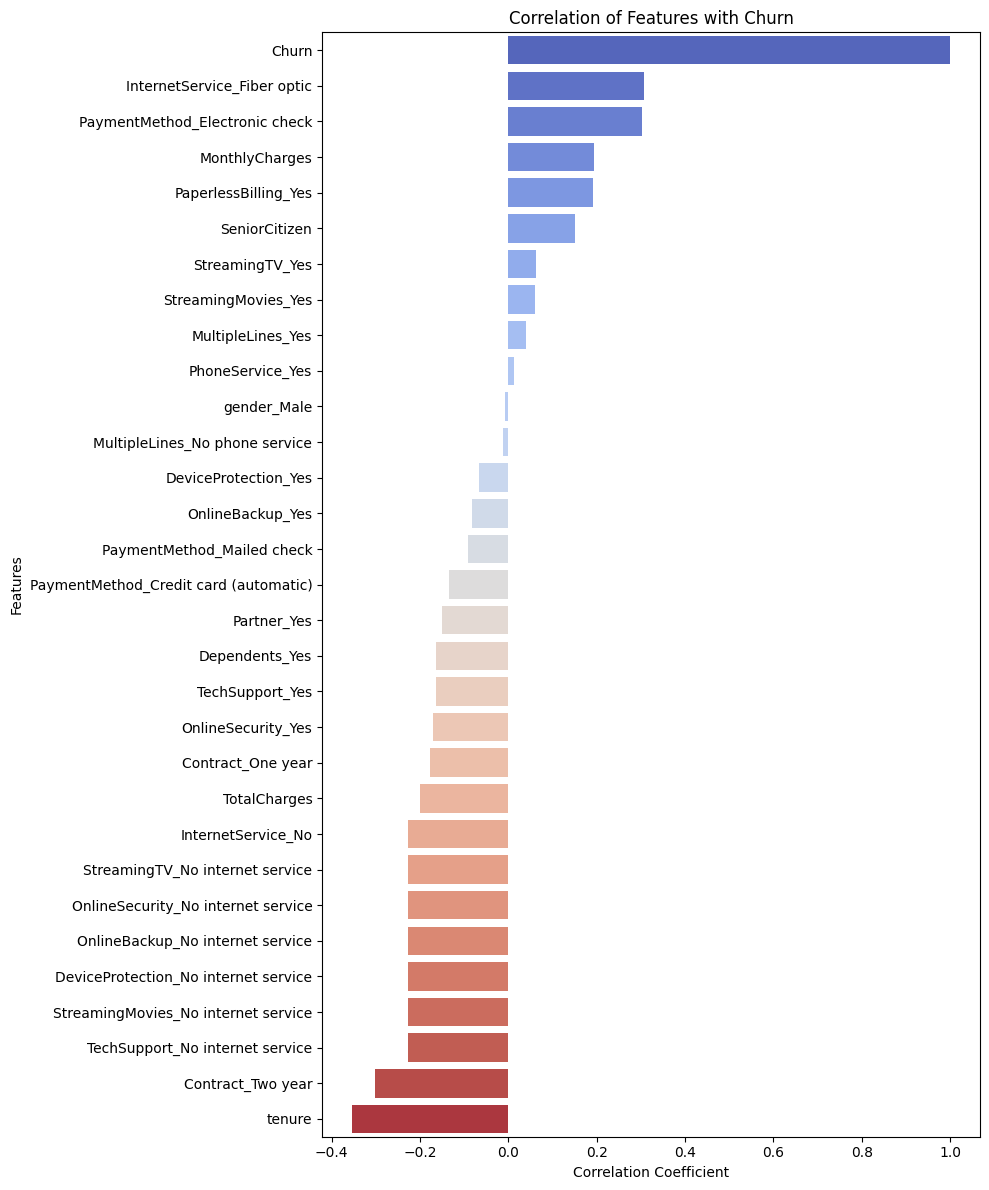

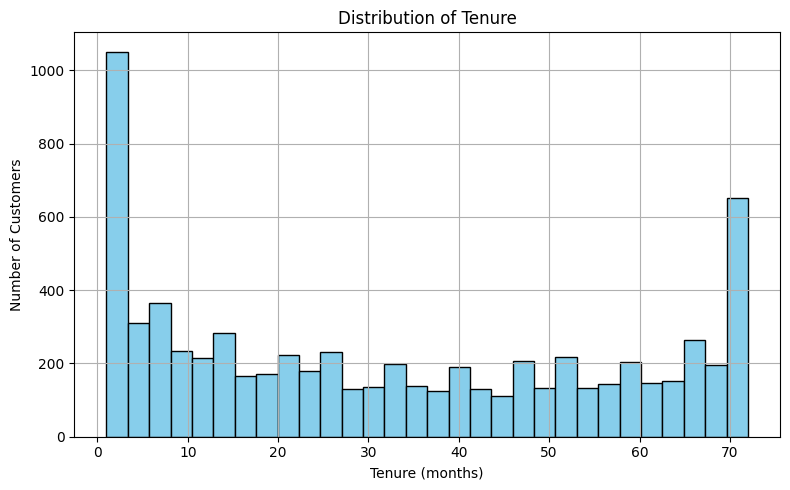

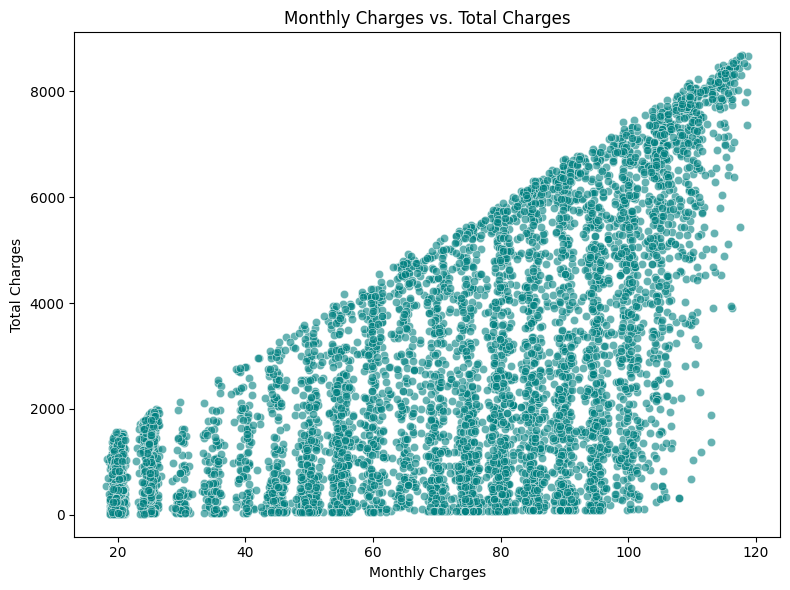

/var/folders/mc/22x1jm1j6k351vp6n53k5dh80000gn/T/ipykernel_34328/2845071079.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='tenure', data=df_cleaned, palette='pastel')


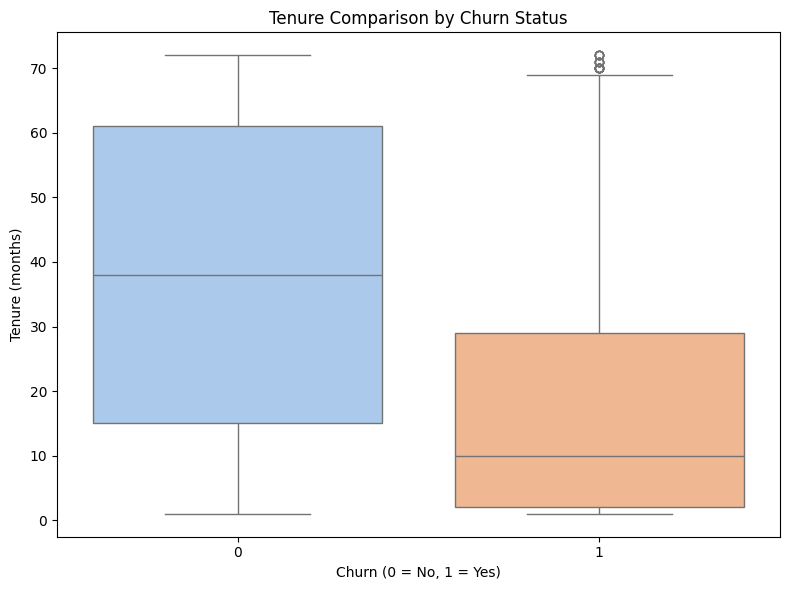

In [15]:
# Create a correlation plot to visualise the correlation between features and
# the target variable “Churn”.

# Calculate correlation matrix
corr_matrix = telecom_cust_dummies.corr()

# Get correlation of all features with the target variable 'Churn'
churn_corr = corr_matrix['Churn'].sort_values(ascending=False)

# Set figure size
plt.figure(figsize=(10, 12))

# Plot a barplot
sns.barplot(x=churn_corr.values, y=churn_corr.index, palette="coolwarm", legend=False)
plt.title('Correlation of Features with Churn')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.tight_layout()
plt.show()
plt.close()

# Create a histogram of the “tenure” column.
plt.figure(figsize=(8, 5))
plt.hist(df_cleaned['tenure'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Tenure')
plt.xlabel('Tenure (months)')
plt.ylabel('Number of Customers')
plt.grid(True)
plt.tight_layout()
plt.show()
plt.close()

# Create a scatter plot of “MonthlyCharges” vs. “TotalCharges”
plt.figure(figsize=(8, 6))
sns.scatterplot(x='MonthlyCharges', y='TotalCharges', data=df_cleaned, alpha=0.6, color='teal')
plt.title('Monthly Charges vs. Total Charges')
plt.xlabel('Monthly Charges')
plt.ylabel('Total Charges')
plt.tight_layout()
plt.show()
plt.close()

# Create a box plot to compare “tenure” for churned and non-churned customers.
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='tenure', data=df_cleaned, palette='pastel')

plt.title('Tenure Comparison by Churn Status')
plt.xlabel('Churn (0 = No, 1 = Yes)')
plt.ylabel('Tenure (months)')
plt.tight_layout()
plt.show()
plt.close()

In [17]:
# Scale all variables using Min-Max Scaling and then split the dataset into training and testing sets (25% for testing):
from sklearn.preprocessing import MinMaxScaler

# Separate features and target
X = telecom_cust_dummies.drop('Churn', axis=1)
y = telecom_cust_dummies['Churn']

# Min-Max Scaling
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and test sets (25% test size)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.25, random_state=42, stratify=y
)

In [18]:
# Create and train the logistic regression model
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train, y_train)

# Predict on test set
y_pred = logreg.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Accuracy: {accuracy:.4f}")

Logistic Regression Accuracy: 0.8060


In [21]:
from sklearn.ensemble import RandomForestClassifier

# Create and configure the Random Forest model
rf_model = RandomForestClassifier(
    # a. Number of trees
    n_estimators=2000,  
    # b. Enable OOB score estimation
    oob_score=True,     
    # c. Max features considered at each split
    max_features='sqrt',  
    # d. Max number of leaf nodes
    max_leaf_nodes=50,  
    # e. Enable bootstrapping
    bootstrap=True,               
    random_state=42,
    # Use all available cores for training
    n_jobs=-1                     
)

# Train the model
rf_model.fit(X_train, y_train)

# Evaluate accuracy on test data

y_pred_rf = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
oob_score = rf_model.oob_score_
oob_error = 1 - oob_score

# Output results
print(f"Random Forest Accuracy on Test Set: {accuracy_rf:.4f}")
print(f"OOB Score (Validation Estimate): {rf_model.oob_score_:.4f}")
print(f"OOB Error Estimation: {oob_error:.4f}")


Random Forest Accuracy on Test Set: 0.7918
OOB Score (Validation Estimate): 0.7990
OOB Error Estimation: 0.2010


In [24]:
#  Implement code to calculate the confusion matrix for both the logistic
# regression and random forest models.
# Compute the precision and recall scores for each model.
from sklearn.metrics import confusion_matrix, precision_score, recall_score

# LOGISTIC REGRESSION 
# Confusion Matrix
cm_logreg = confusion_matrix(y_test, y_pred)
print("Logistic Regression - Confusion Matrix:\n", cm_logreg)

# Precision and Recall
precision_logreg = precision_score(y_test, y_pred)
recall_logreg = recall_score(y_test, y_pred)

print(f"Logistic Regression - Precision: {precision_logreg:.4f}")
print(f"Logistic Regression - Recall: {recall_logreg:.4f}")


# RANDOM FOREST
# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
print("\nRandom Forest - Confusion Matrix:\n", cm_rf)

# Precision and Recall
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)

print(f"Random Forest - Precision: {precision_rf:.4f}")
print(f"Random Forest - Recall: {recall_rf:.4f}")

Logistic Regression - Confusion Matrix:
 [[1150  141]
 [ 200  267]]
Logistic Regression - Precision: 0.6544
Logistic Regression - Recall: 0.5717

Random Forest - Confusion Matrix:
 [[1174  117]
 [ 249  218]]
Random Forest - Precision: 0.6507
Random Forest - Recall: 0.4668


In [25]:
# Logistic Regression
# True Negatives (TN): 1150 — Correctly predicted non-churned

# False Positives (FP): 141 — Predicted churn, but they didn’t churn

# False Negatives (FN): 200 — Missed churners

# True Positives (TP): 267 — Correctly predicted churners

# Random trees:
# TN: 1174 — slightly higher than Logistic Regression

# FP: 117 — fewer false alarms

# FN: 249 — more missed churners than Logistic Regression

# TP: 218 — fewer correctly identified churners

# Precision (Churn Prediction Accuracy):
# Both models are similarly precise — ~65% of customers predicted as churners actually churned.

# This suggests that the models are reasonably good at avoiding false alarms.

# Recall (Churn Detection Rate):
# Logistic Regression recall (57%) is significantly better than Random Forest (47%).

# Logistic Regression catches more actual churners, which is crucial in churn prediction.

# If the goal is to reduce churn (i.e., proactively retain at-risk customers), then recall matters more — better to flag more potential churners, even at the cost of some false positives.

# Logistic Regression outperforms and is better to use than Random Forest in this scenario due to its higher recall.

# Use Logistic Regression for churn prediction if your priority is identifying churners, or tune the Random Forest (e.g., change max_leaf_nodes, use class weights, etc.) to improve its recall.